## Housing Data

This notebook example is from the book [Hands on Machine Learning](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=pd_sbs_14_img_0/139-7697439-5900529?_encoding=UTF8&pd_rd_i=1492032646&pd_rd_r=646561e8-3231-4c19-b8e6-f7b2fb30abfc&pd_rd_w=8WKPS&pd_rd_wg=r6bF9&pf_rd_p=5cfcfe89-300f-47d2-b1ad-a4e27203a02a&pf_rd_r=D86C107WDTSN66BN016S&psc=1&refRID=D86C107WDTSN66BN016S) by Aurelien Geron. 

It is a great quick overview of how a Machine Leanring Algorithm can quickly be built and leveraged in real life business applications with only a couple dozen lines of code in a jupyter notebook.

### Load the data

In this example it is a pretty quick and easy load from github into the jupyter notebook, but in later examples I will incorporate loading from S3, databases, and APIs, but the goal here is to just get familiar with the Machine Learning Toolkit.

In [12]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    return pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

### Quick Data Exploration

Now that the data is loaded into the notebook we can start to explore the underlying data and learn as much about the data types and structure. We should be keeping in mind a couple thing about the data.

#### Size of the data

Is the dataset we are using large enough to develop a machine learning algorithm that applies to the real world? If the dataset is too smal we risk only fitting the model to a small subset of information without truly representing the population data.

On the other hand, if the dataset is too large, we need to start worrying about the ability of the machine we are devleoping on to be able to process the amount of data, and we could potentially need to start working in the Data Engineering space to distribute our data over severaly nodes in a cluster. Don't worry if this doesn't make sense to you right now, as I will focus on Data Engineering in detail in other posts. If you are interested now in distributed computing with python, you can research [Dask](https://dask.org/) or [Spark (PySpark)](https://spark.apache.org/docs/latest/api/python/index.html) in order to get a better understanding.

#### Quality of the Data

Is the data from a reputable & authoratative data source and is it complete and accurate? This is one of the major issues everyone will run into when doing Exploratory Data Analysis (EDA), even at major companies with mature data pipelines. It is best to make sure the data passes a "sniff" test. For example, if there is a date field, are there only dates in it? Does a population field only have Integers? Keep these questions in mind when exploring the datasets. A quick way to check a couple records is by using the ```.head()``` function in python to view the top couple of records.

In [15]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Data Types

Since we just discussed data quality, a good way to verify that an INT field is actually an integer is to use the ```.info()``` function to view the Data types (DType), but it also provides other useful information like the size of the dataset (which will help when deciding whether you should/need to distribute the data, as well as column counts, and number of records and whether or not they are null. 

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Summary Statistics

Some more information you will want to know (and comes in handy later when deciding what features and labels you may to use) is the ```.describe()``` function on the dataset. This will give you the count of records as well as Min/Max, Percentiles, Mean, and Standard Deviations. This will let us understand our dataset better, which may come from user experience or anecdotal evidence. For example, if on our housing dataset I notice that the average number of bedrooms is 8, I may com to a couple conclusions, like maybe there are a lot of mansions in this dataset, or maybe apartments are being included as "houses". We can always find out what really is going on with more analysis, but it could help me realize the data is poor or wrong before continuing my analysis.

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Categorical Variables

Notice in our last output that we are missing a field from the dataset. That is because we cannot run summary statistics on objects that are not INT or FLOAT. So what can we do? We can split out the categories within that field to get a better understanding of what exactly makes up that field and how many objects fall into that category.

Be aware of what might actually be a primary key (which is a unique key per record) as this will not be valuable as categorical variable.

In [20]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Distribution of Numerical Data

A good next step in the process is to visualize our numerical data by seeing how often certain numbers repeat or their proximity to one another. We can use histograms or density plots to easily visualize these differences. Histograms allow us to separate groups of data into "bins". These bins are a count of datapoints that fall into categories or numeric ranges of the bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2489ead0>,
      dtype=object)

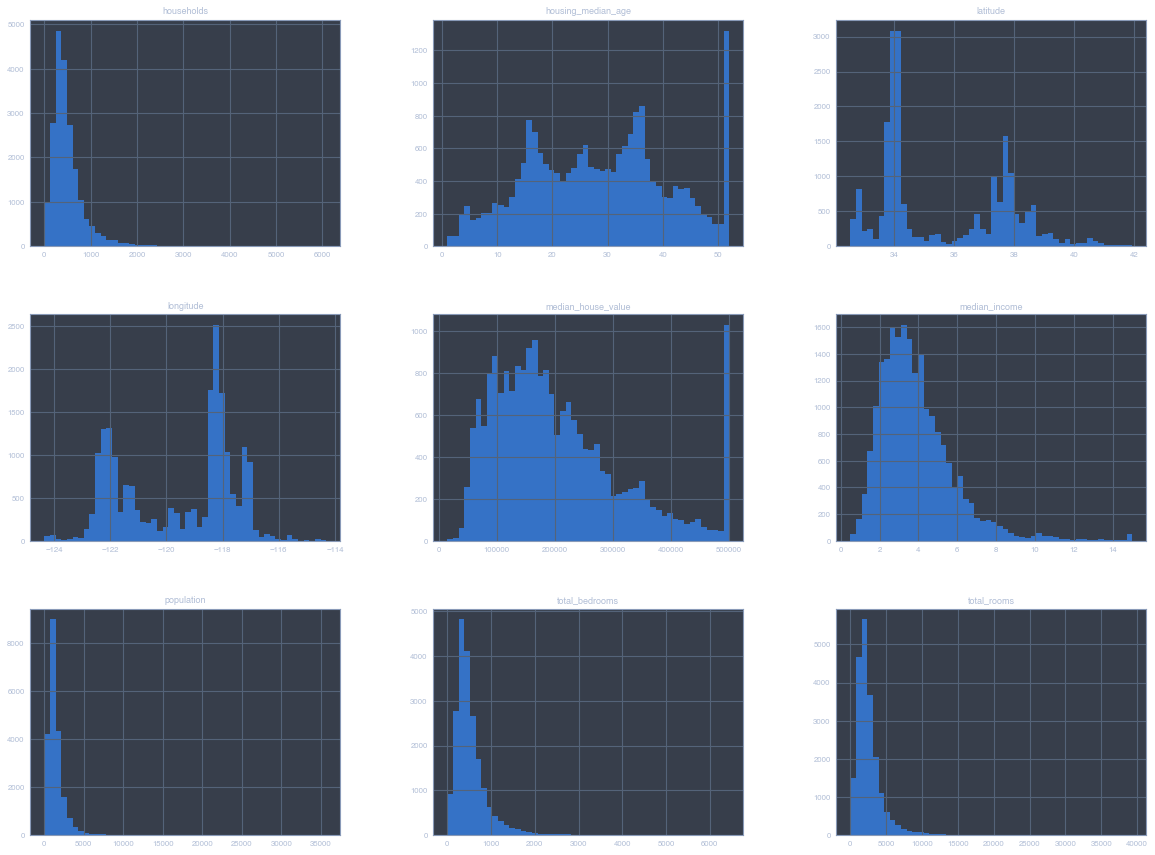

In [23]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

### Building the Training and Testing Sets for the model

An important part of building any Machine Learning Model is to make sure that you have a training set (used to build the model) and a test set that you can test the output model against. This mainly helps in making sure that your model is not underfitting, overfitting, and is valid for building a business application. For this example, we are going to build a model based on random selection of 80% of the data and test the model on the remaining 20%. This may not always be the best way to split, as we ma

In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [28]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.0+ MB


In [30]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 514.8+ KB
